In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,8))

<Figure size 1008x576 with 0 Axes>

<Figure size 1008x576 with 0 Axes>

In [24]:
dt = pd.read_csv("Ad Click Data.csv")
dt.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [26]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,64.929524,15.844699,32.60,51.27,68.11,78.46,91.43
Age,1000.0,36.009000,8.785562,19.00,29.00,35.00,42.00,61.00
Area Income,987.0,54980.667234,13439.998510,13996.50,46947.57,57009.76,65479.35,79484.80
Daily Internet Usage,989.0,179.863620,43.870142,104.78,138.71,182.65,218.79,267.01
Male,997.0,0.480441,0.499868,0.00,0.00,0.00,1.00,1.00
Clicked on Ad,1000.0,0.500000,0.500250,0.00,0.00,0.50,1.00,1.00


In [27]:
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' ]
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

In [28]:
dt[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,64.929524,15.844699,32.60,51.27,68.11,78.46,91.43
Age,1000.0,36.009000,8.785562,19.00,29.00,35.00,42.00,61.00
Area Income,987.0,54980.667234,13439.998510,13996.50,46947.57,57009.76,65479.35,79484.80
Daily Internet Usage,989.0,179.863620,43.870142,104.78,138.71,182.65,218.79,267.01


In [29]:
dt[Categorical_cols].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,999,991
unique,1000,968,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [30]:
pd.crosstab(index=dt['Country'],columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


In [31]:
dt.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [36]:
dt["Daily Time Spent on Site"].fillna(dt["Daily Time Spent on Site"].mean(),inplace=True)
dt["Area Income"].fillna(dt["Area Income"].mean(),inplace=True)
dt["Daily Internet Usage"].fillna(dt["Daily Internet Usage"].mean(),inplace=True)

In [37]:
dt.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        1
Male                        3
Country                     9
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [41]:
dt=dt.dropna()

In [42]:
dt.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

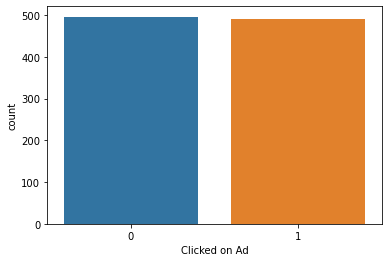

In [43]:
sns.countplot(x = 'Clicked on Ad', data = dt)

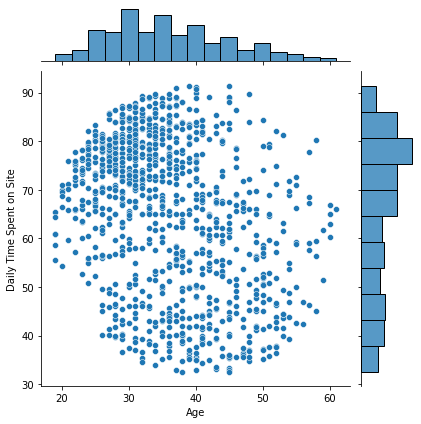

In [44]:
# Jointplot of daily time spent on site and age
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = dt)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


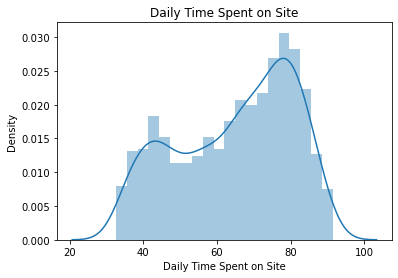

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


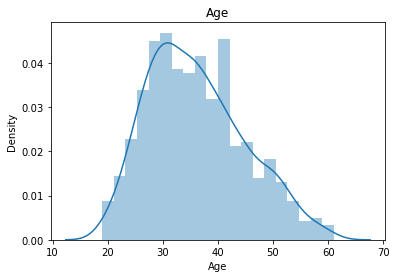

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


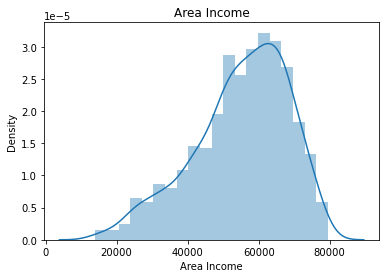

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


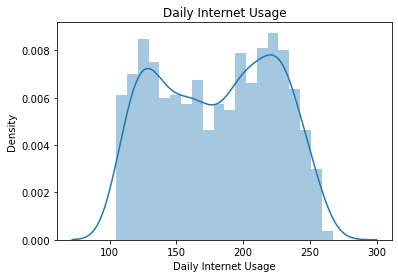

In [45]:
plots = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']
for i in plots:
    sns.distplot(dt[i],bins= 20)    
    plt.title(i)    
    plt.show()

<AxesSubplot:>

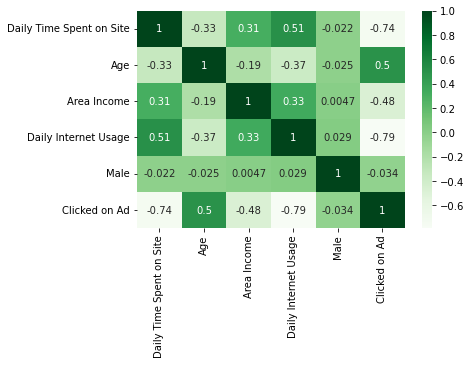

In [58]:
sns.heatmap(dt.corr(), cmap='Greens', annot = True)

In [59]:
dt.groupby(['Male','Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0.0,248,262
1.0,248,229


In [60]:
X = dt[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = dt['Clicked on Ad']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [63]:
classifier.score(X_test,y_test)

0.9635627530364372

Text(33.0, 0.5, 'Truth')

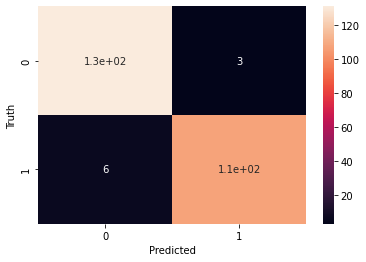

In [69]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       134
           1       0.97      0.95      0.96       113

    accuracy                           0.96       247
   macro avg       0.96      0.96      0.96       247
weighted avg       0.96      0.96      0.96       247

